# Imports & Downloads

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import unicodedata

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

In [128]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [129]:
stop_words = stopwords.words()

# Loading the data

In [130]:
#  avoid characters of text column to be cut off by default Pandas DataFrame limitations
pd.set_option('display.max_colwidth', 400)

In [131]:
df_raw_val = pd.read_csv("C:\\Users\\admin\\PycharmProjects\\WebScience24\\data\\twitter_hate-speech\\test.csv", index_col=0,
                         encoding="utf-8-sig")
df_raw_val.head()

,tweet
id,
31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [132]:
df_raw_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17197 entries, 31963 to 49159
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   17197 non-null  object
dtypes: object(1)
memory usage: 268.7+ KB


In [133]:
df_raw_train = pd.read_csv("C:\\Users\\admin\\PycharmProjects\\WebScience24\\data\\twitter_hate-speech\\train.csv", index_col=0,
                           encoding="utf-8-sig")
df_raw_train.head()

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation


In [134]:
df_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


# Preparing the data

In [135]:
df = df_raw_train

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


## Inconsistent text & typos

In [137]:
df.label.unique()

array([0, 1], dtype=int64)

In [138]:
def simplify(text):
    try:
        text = str(text)
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore') .decode("utf-8")
    return str(text)

In [139]:
df['tweet_new'] = df['tweet'].apply(simplify)

In [140]:
df.tweet

id
1                                      @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
2                 @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
3                                                                                                                        bihday your majesty
4                                                     #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦  
5                                                                                                     factsguide: society now    #motivation
                                                                        ...                                                                 
31958                                                                   ate @user isz that youuu?ðððððððððâ¤ï¸ 
31959     

In [141]:
df.tweet_new

id
1                                      @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
2                 @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
3                                                                                                                        bihday your majesty
4                                                                                     #model   i love u take with u all the time in ur!!!   
5                                                                                                     factsguide: society now    #motivation
                                                                        ...                                                                 
31958                                                                                                           ate @user isz that youuu?ai 
31959     

In [142]:
df.tweet = df.tweet_new
df.drop(['tweet_new'], axis=1, inplace=True)

## Duplicate-Check

In [143]:
df.duplicated().sum()

2437

In [144]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## NaN-Check

In [145]:
df.isna().sum()

label    0
tweet    0
dtype: int64

In [146]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## Outlier

In [147]:
# Spalte: Tweet
# Ansatz: prüfen, ob es Ausreißer bei der Länge und/oder bei der Wortzahl pro Tweets gibt
df["char_count"] = df["tweet"].str.len()
df["word_count"] = df["tweet"].str.split().str.len()
df = df.reset_index(drop=True)

In [148]:
df["char_count"].describe()

count    29525.000000
mean        82.516308
std         29.504347
min          7.000000
25%         60.000000
50%         86.000000
75%        106.000000
max        179.000000
Name: char_count, dtype: float64

Text(0, 0.5, 'Number of Tweets')

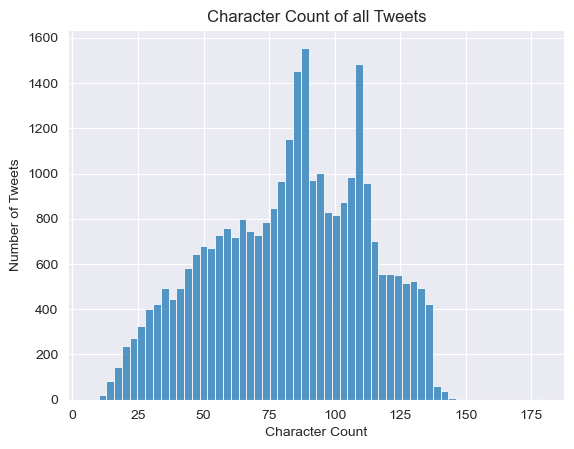

In [149]:
sns.histplot(df["char_count"])

plt.title('Character Count of all Tweets')

plt.xlabel('Character Count')
plt.ylabel('Number of Tweets')

Text(0, 0.5, 'Character Count')

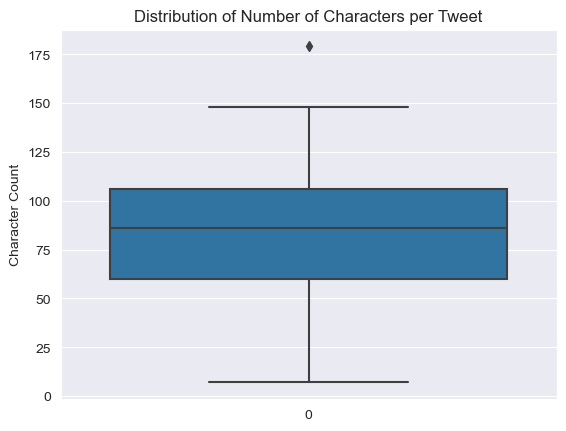

In [150]:
sns.boxplot(df["char_count"])

plt.title('Distribution of Number of Characters per Tweet')

plt.ylabel('Character Count')

In [151]:
df["word_count"].describe()

count    29525.000000
mean        13.101406
std          5.570405
min          1.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         34.000000
Name: word_count, dtype: float64

Text(0, 0.5, 'Number of Tweets')

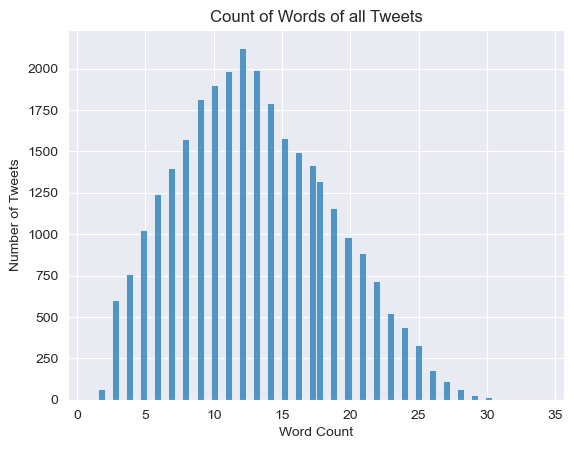

In [152]:
sns.histplot(df["word_count"])

plt.title('Count of Words of all Tweets')

plt.xlabel('Word Count')
plt.ylabel('Number of Tweets')

Text(0, 0.5, 'Number of Words')

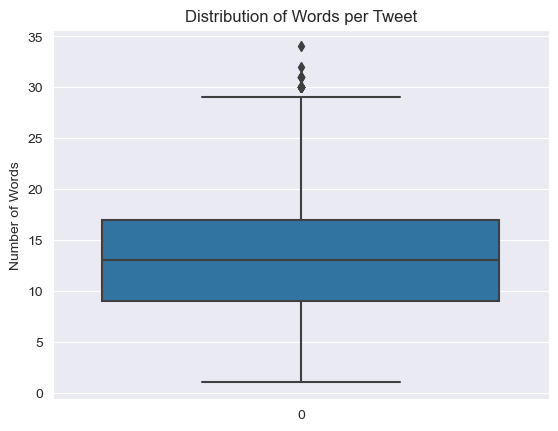

In [153]:
sns.boxplot(data=df["word_count"])

plt.title('Distribution of Words per Tweet')

plt.ylabel('Number of Words')

In [154]:
# Ausreißer auf numerische Art bestimmen: 3 Standardabweichungen vom Mittelwert entfernt = Ausreißer
def find_outlier(data):
    for num_col in data.select_dtypes(["number"]).columns:
        sd = data[num_col].std()
        mean = data[num_col].mean()
        result = [out for out in data[num_col] if (out > mean + 3 * sd) or (out < mean - 3 * sd)]
        print()
        print("Column: ", num_col)
        print("Mean: ", mean, "; Std: ", sd)
        print("Outlier: ", len(result), "; Values: ", sorted(result))

In [155]:
find_outlier(df[["char_count", "word_count"]])


Column:  char_count
Mean:  82.5163082133785 ; Std:  29.504346845506777
Outlier:  1 ; Values:  [179]

Column:  word_count
Mean:  13.101405588484335 ; Std:  5.570405108824537
Outlier:  22 ; Values:  [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 34]


In [156]:
df[df["char_count"] >= 177]

,label,tweet,char_count,word_count
29087,0,&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt; #aaaa bihday #to #you #aaa #33a,179,7


In [157]:
df[df["word_count"] >= 30]

,label,tweet,char_count,word_count
227,1,"if you hold open a door for a woman because she's a woman and not because it's a nice thing to do, that's . don't even try to deny it",133,30
362,0,anas + nimra + farishta + mawia + khushal 960 + 952 + 503 + 484 + 435 = 3334 the number of marks obtained is too damn high :p,130,30
1683,0,"@user this summer is about to be crazy. i can already tell i'm going to have to stay out the way, and not show my face at too many ea",134,30
2127,0,father's day # i m really vry lucky to hav u as my dad... u r my frnd my strength... n thank u for alywys suppobg me. luv u papa,130,30
5563,0,one exam :d even though i woke up at 5 to get my ass to an exam on time im not tired. is it the #cold or am i just for it to end?,131,34
10969,0,"@ a bar to watch the cavs and a guy hid something under his arm weirdly, so the baender asked him to show it, def scared it was a gun",135,30
11476,0,"life is what u make of it &amp; i choose 2 make mine a happy one, full of fun &amp; laughter n u r more than welcome 2 join me #lovemylife",141,31
14832,0,i'm just say i have a girlfriend and see how savage some of y'all really are . . . cause in 2016 . . . y'all really don't give. . .,133,31
15319,0,i needed money for parking but i only have my card so i looked on my car floor and came up w 3$ in change easy . i needa clean my car,135,32
15530,0,: guy just ask me for some change. after i gave him what was in my pocket he lit a cigarette as i walked off. cigs in aus nearly $1ea,134,30


=> Strategie: Einträge droppen, um ML Modelle nicht durch Ausreißer zu beeinflussen (bei DeepLearning-Modellen tendenziell irrelevant)

In [158]:
df = df[df["char_count"] < 177]
df[df["char_count"] >= 177]

,label,tweet,char_count,word_count


In [159]:
df = df[df["word_count"] < 30]
df[df["word_count"] >= 30]

,label,tweet,char_count,word_count


In [160]:
# df.drop(['Char_Count', 'Word_Count'], axis=1, inplace=True)

## Datensatz nach Bereinigung

In [161]:
print(df.count())
print(df_raw_train.count())
print(df.count() - df_raw_train.count())
print((df.count() / df_raw_train.count() - 1) * 100)

label         29502
tweet         29502
char_count    29502
word_count    29502
dtype: int64
label    31962
tweet    31962
dtype: int64
char_count       NaN
label        -2460.0
tweet        -2460.0
word_count       NaN
dtype: float64
char_count        NaN
label        -7.69664
tweet        -7.69664
word_count        NaN
dtype: float64


## Check Val/Test-Data

In [162]:
# df_val_raw = pd.read_csv("C:\\Users\\admin\\PycharmProjects\\WebScience24\\data\\twitter_hate-speech\\test.csv", index_col=0)
# TODO

## Save cleaned Data

In [163]:
filepath = Path("data/train_cleaned.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)

In [164]:
df.to_csv(filepath)

# EDA - Part 1

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29502 entries, 0 to 29524
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       29502 non-null  int64 
 1   tweet       29502 non-null  object
 2   char_count  29502 non-null  int64 
 3   word_count  29502 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [166]:
df.describe()

,label,char_count,word_count
count,29502.000000,29502.000000,29502.000000
mean,0.068199,82.475222,13.088638
std,0.252091,29.477289,5.552097
min,0.000000,7.000000,1.000000
25%,0.000000,60.000000,9.000000
50%,0.000000,86.000000,13.000000
75%,0.000000,106.000000,17.000000
max,1.000000,148.000000,29.000000


## Korrelationsanalyse

<Axes: >

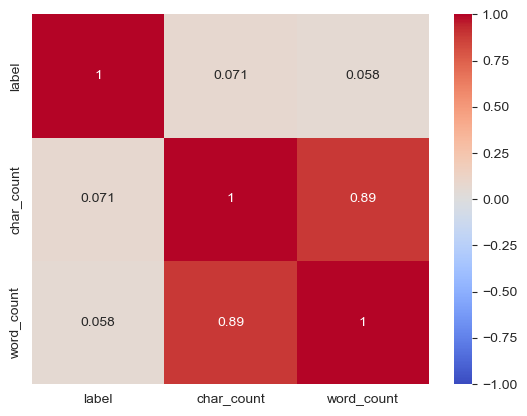

In [167]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

In [168]:
target_corr = df.corr(numeric_only=True)["label"]
target_corr.abs().sort_values(ascending=False)

label         1.000000
char_count    0.070686
word_count    0.058020
Name: label, dtype: float64

Korrelationsanalyse feature<->target => keine originären numerischen Werte, bei den erzeugten numerischen Werten keine nennenswerte Korrelation erkennbar

## Targetanalyse

In [169]:
df["label"].value_counts()

0    27490
1     2012
Name: label, dtype: int64

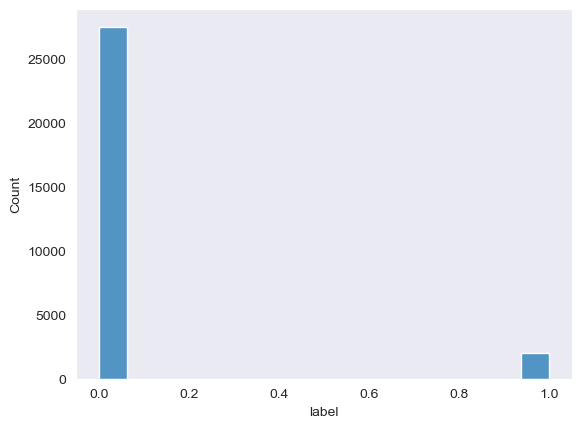

In [170]:
sns.histplot(df["label"])
plt.grid()
plt.show()

## Featureanalyse

<Axes: xlabel='word_count', ylabel='Count'>

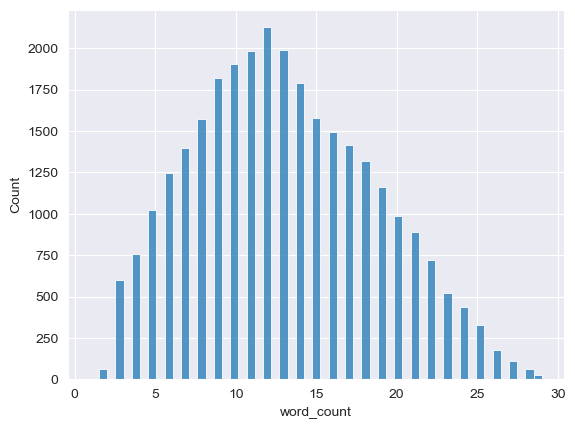

In [171]:
# Feature: Tweet - word-count
sns.histplot(df["word_count"])

In [172]:
df.word_count.describe()

count    29502.000000
mean        13.088638
std          5.552097
min          1.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         29.000000
Name: word_count, dtype: float64

<Axes: xlabel='char_count', ylabel='Count'>

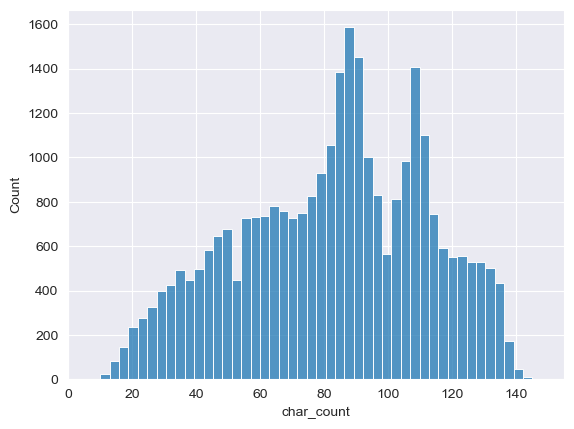

In [173]:
# Feature: Tweet - char-count
sns.histplot(df["char_count"])

In [174]:
df.char_count.describe()

count    29502.000000
mean        82.475222
std         29.477289
min          7.000000
25%         60.000000
50%         86.000000
75%        106.000000
max        148.000000
Name: char_count, dtype: float64

## Feature x Target

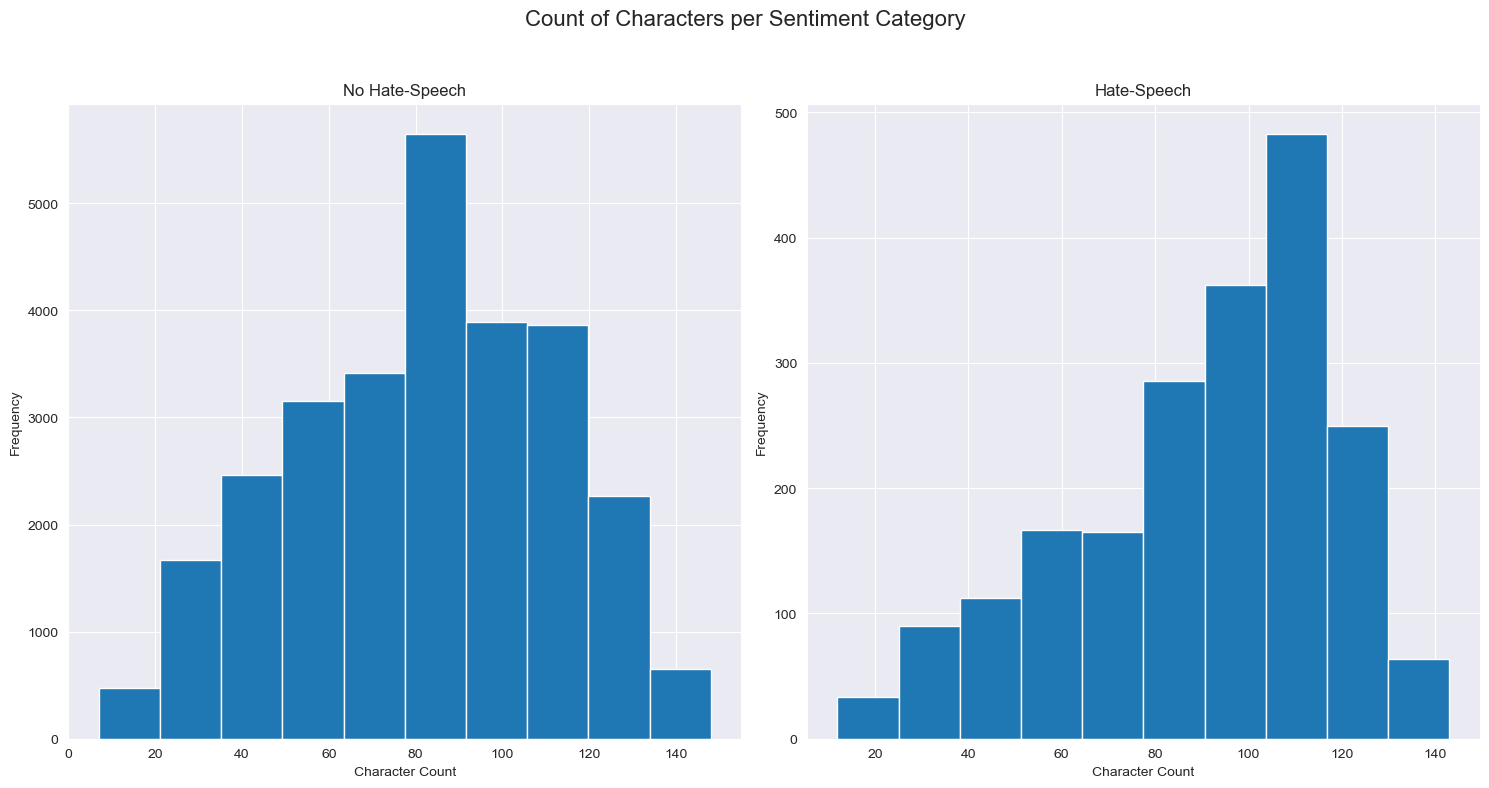

In [175]:
#Character Count
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Positive Tweets
ax1.hist(df[df['label'] == 0]['char_count'])
ax1.set_title('No Hate-Speech')
ax1.set_xlabel('Character Count')  
ax1.set_ylabel('Frequency')          

# Negative Tweets
ax2.hist(df[df['label'] == 1]['char_count'])
ax2.set_title('Hate-Speech')
ax2.set_xlabel('Character Count')  
ax2.set_ylabel('Frequency')

plt.suptitle('Count of Characters per Sentiment Category', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

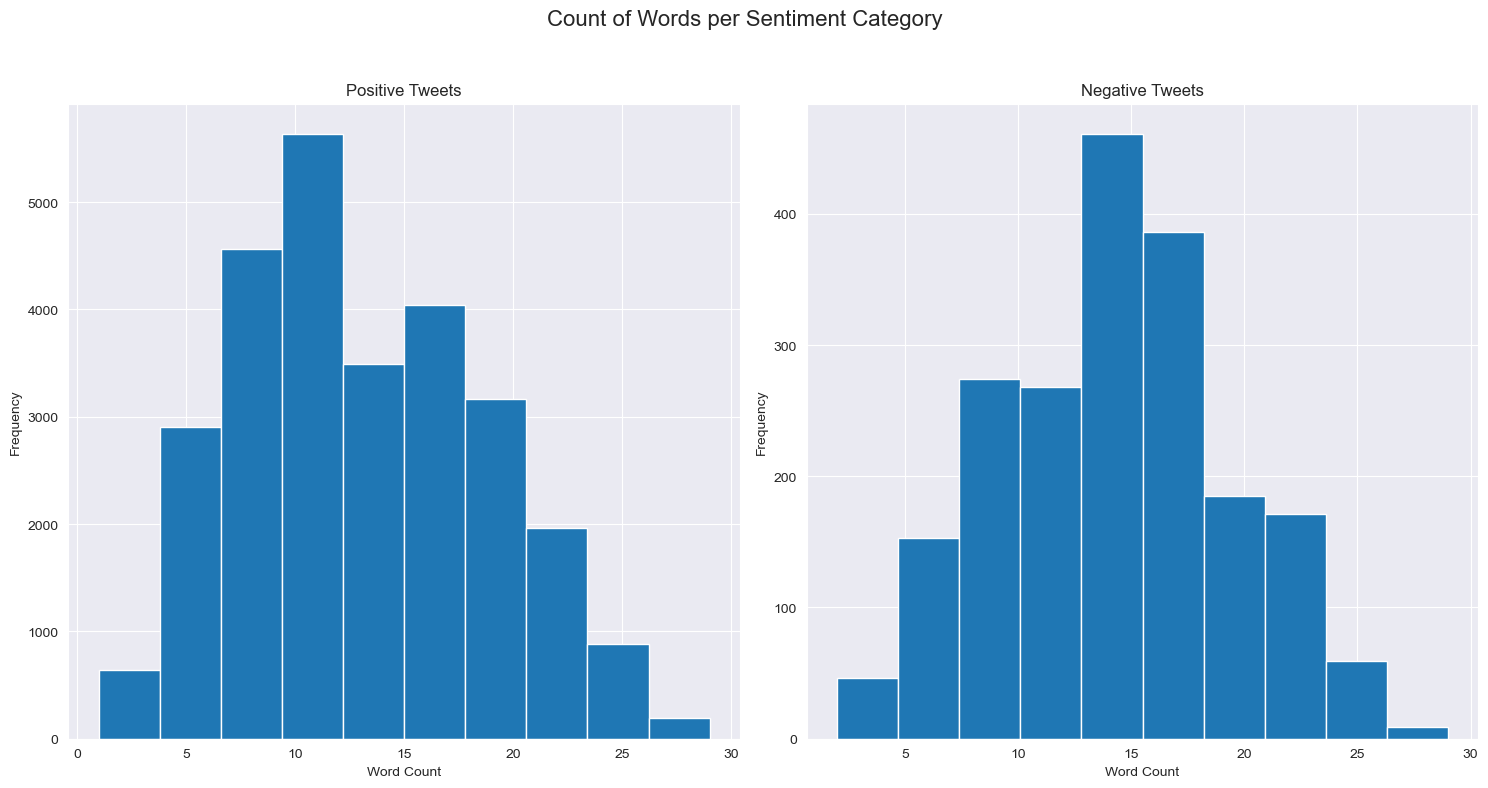

In [176]:
# Word Count
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Positive Tweets
ax1.hist(df[df['label'] == 0]['word_count'])
ax1.set_title('Positive Tweets')
ax1.set_xlabel('Word Count')  
ax1.set_ylabel('Frequency')    

# Negative Tweets
ax2.hist(df[df['label'] == 1]['word_count'])
ax2.set_title('Negative Tweets')
ax2.set_xlabel('Word Count')  
ax2.set_ylabel('Frequency')

plt.suptitle('Count of Words per Sentiment Category', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

# Data Preprocessing for Models

## Text cleaning: emojis, toLower etc.

In [177]:
def cleaning(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower()  # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text)  # removing URL links
    text = re.sub(r"\b\d+\b", "", text)  # removing number
    text = re.sub('<.*?>+', '', text)  # removing special characters,
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    #removing emoji:
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # removing short form:
    text = re.sub("isn't", 'is not', text)
    text = re.sub("he's", 'he is', text)
    text = re.sub("wasn't", 'was not', text)
    text = re.sub("there's", 'there is', text)
    text = re.sub("couldn't", 'could not', text)
    text = re.sub("won't", 'will not', text)
    text = re.sub("they're", 'they are', text)
    text = re.sub("she's", 'she is', text)
    text = re.sub("There's", 'there is', text)
    text = re.sub("wouldn't", 'would not', text)
    text = re.sub("haven't", 'have not', text)
    text = re.sub("That's", 'That is', text)
    text = re.sub("you've", 'you have', text)
    text = re.sub("He's", 'He is', text)
    text = re.sub("what's", 'what is', text)
    text = re.sub("weren't", 'were not', text)
    text = re.sub("we're", 'we are', text)
    text = re.sub("hasn't", 'has not', text)
    text = re.sub("you'd", 'you would', text)
    text = re.sub("shouldn't", 'should not', text)
    text = re.sub("let's", 'let us', text)
    text = re.sub("they've", 'they have', text)
    text = re.sub("You'll", 'You will', text)
    text = re.sub("i'm", 'i am', text)
    text = re.sub("we've", 'we have', text)
    text = re.sub("it's", 'it is', text)
    text = re.sub("don't", 'do not', text)
    text = re.sub("that´s", 'that is', text)
    text = re.sub("I´m", 'I am', text)
    text = re.sub("it’s", 'it is', text)
    text = re.sub("she´s", 'she is', text)
    text = re.sub("he’s'", 'he is', text)
    text = re.sub('I’m', 'I am', text)
    text = re.sub('I’d', 'I did', text)
    text = re.sub("he’s'", 'he is', text)
    text = re.sub('there’s', 'there is', text)

    return text

In [178]:
dt = df['tweet'].apply(cleaning)

In [179]:
dt = pd.DataFrame(dt)
dt['label'] = df['label']

In [180]:
dt.head()

,tweet,label
0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,0
1,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,0
2,bihday your majesty,0
3,model i love u take with u all the time in ur,0
4,factsguide society now motivation,0


## Stopwords

In [181]:
dt['no_sw'] = dt['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [182]:
dt.head(20)

,tweet,label,no_sw
0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,0,user father dysfunctional selfish drags kids dysfunction run
1,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,0,user user lyft credit offer wheelchair vans pdx disapointed getthanked
2,bihday your majesty,0,bihday majesty
3,model i love u take with u all the time in ur,0,model love time ur
4,factsguide society now motivation,0,factsguide society motivation
5,huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo,0,huge fare big talking leave chaos pay disputes allshowandnogo
6,user camping tomorrow user user user user user user user dannya,0,user camping tomorrow user user user user user user user dannya
7,the next school year is the year for exams cant think about that school exams hate imagine actorslife revolutionschool girl,0,school year year exams school exams hate imagine actorslife revolutionschool girl
8,we won love the land allin cavs champions cleveland clevelandcavaliers a,0,love land allin cavs champions cleveland clevelandcavaliers
9,user user welcome here im its so gr8,0,user user welcome gr8


## Most frequent words

In [183]:
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(20)
temp = pd.DataFrame(cnt.most_common(20))
temp.columns = ['word', 'count']

In [184]:
temp.head(20)

,word,count
0,user,17122
1,love,2189
2,day,2122
3,happy,1560
4,amp,1483
5,life,1040
6,today,966
7,bihday,819
8,time,784
9,fathers,698


In [185]:
# most frequent words erstmal nicht entfernen
# todo: mit Gruppe klären: welche/wie viele most frequent words entfernen

In [186]:
# FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
# def remove_freqwords(text):
#     return " ".join([word for word in str(text).split() if word not in FREQWORDS])
# dt["no_sw_no_freqwo"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))

In [187]:
# dt.head()

In [188]:
# dt[dt.no_sw != dt.no_sw_no_freqwo].head()

## Lemmatization

In [189]:
wordnet_lem = WordNetLemmatizer()
dt['no_sw_lem'] = dt['no_sw'].apply(wordnet_lem.lemmatize)

In [190]:
dt.head()

,tweet,label,no_sw,no_sw_lem
0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,0,user father dysfunctional selfish drags kids dysfunction run,user father dysfunctional selfish drags kids dysfunction run
1,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,0,user user lyft credit offer wheelchair vans pdx disapointed getthanked,user user lyft credit offer wheelchair vans pdx disapointed getthanked
2,bihday your majesty,0,bihday majesty,bihday majesty
3,model i love u take with u all the time in ur,0,model love time ur,model love time ur
4,factsguide society now motivation,0,factsguide society motivation,factsguide society motivation


In [191]:
dt[dt.no_sw != dt.no_sw_lem].head(500)

,tweet,label,no_sw,no_sw_lem
243,few more days till who is,0,days,day
1767,do what makes you,0,makes,make
1946,emails,0,emails,email
3083,he got you two rings just be,0,rings,ring
3916,this makes me so,0,makes,make
4707,if it makes you go for it,0,makes,make
5452,many many americans thats right,0,americans,american
5795,well said tubes,0,tubes,tube
6310,what makes me please let me know,1,makes,make
6796,my books arent here,0,books,book


## Check again: Duplicates / NaN

In [192]:
dt.duplicated().sum()

83

In [193]:
dt.drop_duplicates(inplace=True)
dt.duplicated().sum()

0

In [194]:
dt.isna().sum()

tweet        0
label        0
no_sw        0
no_sw_lem    0
dtype: int64

In [195]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29419 entries, 0 to 29524
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      29419 non-null  object
 1   label      29419 non-null  int64 
 2   no_sw      29419 non-null  object
 3   no_sw_lem  29419 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


## Save preprocessed data

In [196]:
filepath = Path("data/train_cleaned_preprocessed.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)

In [197]:
dt.to_csv(filepath)

## EDA - Part 2

In [217]:
# Häufige Wörte bei HS
tweet_hs = dt.no_sw_lem[dt.label == 1]

In [218]:
cnt_hs = Counter()
for text in tweet_hs.values:
    for word in text.split():
        cnt_hs[word] += 1
cnt_hs.most_common(20)
temp_hs = pd.DataFrame(cnt_hs.most_common(20))
temp_hs.columns = ['word', 'count']
temp_hs.head(20)

,word,count
0,user,1745
1,amp,214
2,trump,163
3,white,135
4,black,108
5,allahsoil,89
6,racist,87
7,women,72
8,obama,66
9,hate,65


In [ ]:
sns.lineplot(data=temp_hs, y=temp_hs['word'], x=temp_hs['count'])
plt.title("Top 10 most frequent words in non-HS (no sw + lem)")

In [219]:
# Häufige Wörte bei nicht-HS
tweet_nohs = dt.no_sw_lem[dt.label == 0]

In [220]:
cnt_nohs = Counter()
for text in tweet_nohs.values:
    for word in text.split():
        cnt_nohs[word] += 1
cnt_nohs.most_common(20)
temp_nohs = pd.DataFrame(cnt_nohs.most_common(20))
temp_nohs.columns = ['word', 'count']

In [221]:
temp_nohs.head(20)

,word,count
0,user,15338
1,love,2162
2,day,2108
3,happy,1529
4,amp,1268
5,life,1032
6,today,955
7,bihday,817
8,time,763
9,fathers,687


Text(0.5, 1.0, 'Top 10 most frequent words in HS tweet (no sw + lem)')

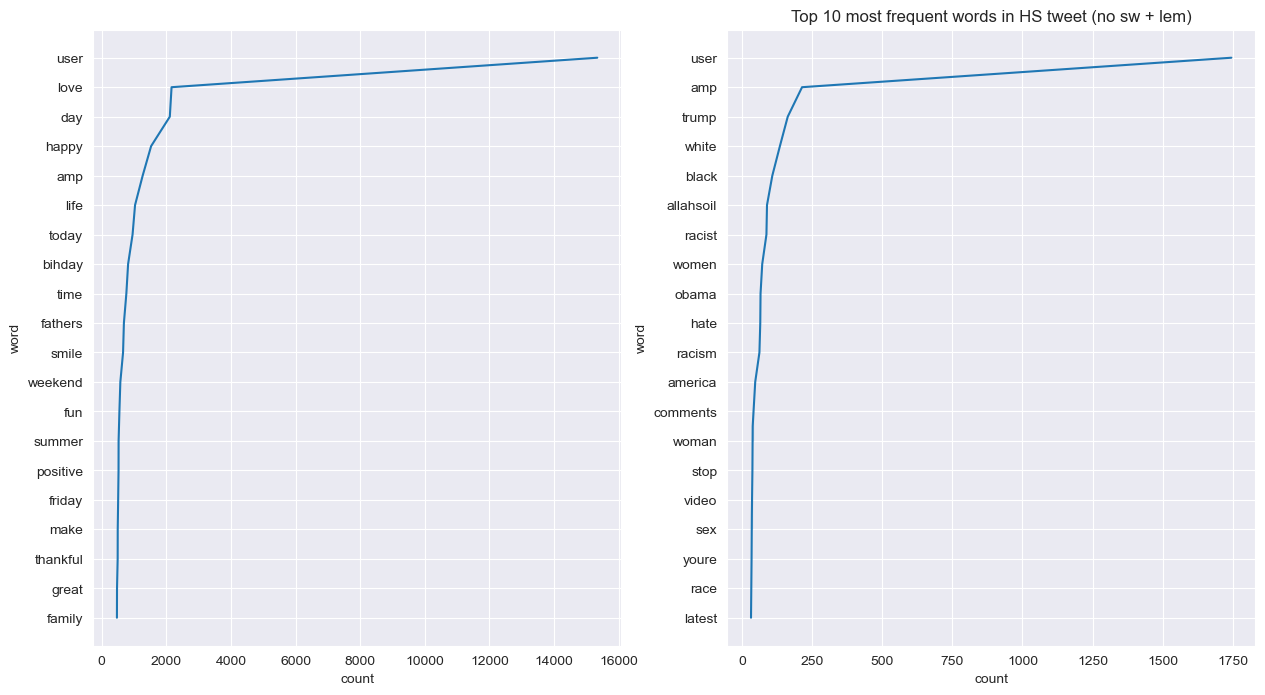

In [228]:
fig, ax =plt.subplots(1,2, figsize=(15, 8))

sns.lineplot(data=temp_nohs, y=temp_nohs['word'], x=temp_nohs['count'], ax=ax[0])
plt.title("Top 10 most frequent words in non-HS tweet (no sw + lem)")

sns.lineplot(data=temp_hs, y=temp_hs['word'], x=temp_hs['count'], ax=ax[1])
plt.title("Top 10 most frequent words in HS tweet (no sw + lem)")